**OBJECTIVE - CLASSIFICATION**
To build and compare multiple supervised classification models that predict customer sentiment using structured transactional features, and evaluate their performance using standard classification metrics.

In [42]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize


In [43]:
#load dataset
df=pd.read_csv("master_dataset.csv")

In [44]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumery,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,auto,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601


In [45]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                           997
review_score                        997
review_comment_title             105154


In [46]:
#feature engineering
#feature engineering for target variable
def sentiment(score):
    if score <=2:
        return "Negative"
    elif score ==3:
        return "Neutral"
    else:
        return "Positive"
    
df['review_sentiment']=df['review_score'].apply(sentiment)

In [47]:
print(df['review_sentiment'].dtype)

object


In [48]:
print(df['review_sentiment'].nunique())

3


In [49]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,review_sentiment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,perfumery,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427,Positive
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,21.0,auto,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601,Positive


In [50]:
#calculating distance in kms
# Distance (Haversine)
def haversine(lat1,lon1,lat2,lon2):
    R = 6371
    lat1,lon1,lat2,lon2 = map(np.radians,[lat1,lon1,lat2,lon2])
    dlat = lat2-lat1
    dlon = lon2-lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2*R*np.arcsin(np.sqrt(a))

df["distance_km"] = haversine(
    df["customer_lat"],
    df["customer_lng"],
    df["seller_lat"],
    df["seller_lng"]
)

In [51]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,review_sentiment,distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive,18.576110
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive,18.576110
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,Positive,18.576110
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,perfumery,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427,Positive,851.495069
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,auto,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601,Positive,514.410666


In [52]:
#calculating delivery time
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])

df['delivery_time']=(df['order_purchase_timestamp']-df['order_delivered_customer_date']).dt.days


In [53]:
#defining the features
features = ["price","freight_value","delivery_time","distance_km","customer_state","seller_state","product_category_name_english"]

X = df[features]
y = df["review_sentiment"]



In [54]:
#creating pipeline for preprocessing
num_cols = ["price","freight_value","delivery_time","distance_km"]
cat_cols = ["customer_state","seller_state","product_category_name_english"]

# Numerical pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])



In [55]:
#splitting train test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [56]:
X_train.dtypes

price                            float64
freight_value                    float64
delivery_time                    float64
distance_km                      float64
customer_state                    object
seller_state                      object
product_category_name_english     object
dtype: object

In [57]:
X_train.isnull().sum()

price                             672
freight_value                     672
delivery_time                    2719
distance_km                      1147
customer_state                      0
seller_state                      672
product_category_name_english    2053
dtype: int64

In [58]:
y_test.dtype

dtype('O')

In [59]:
y_test

56431     Positive
48018     Negative
12758     Positive
114057    Positive
68021     Positive
            ...   
59515     Positive
4120       Neutral
108766    Positive
103696    Positive
76490     Positive
Name: review_sentiment, Length: 23829, dtype: object

/home/ruchika-kaur/Documents/Brazilian_dataset_ML_NLP_Mini_Project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


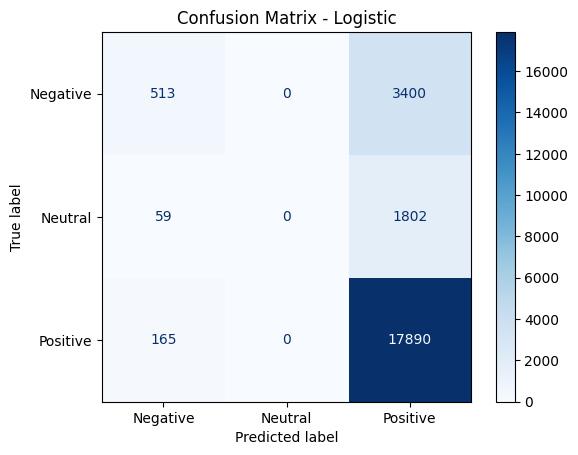

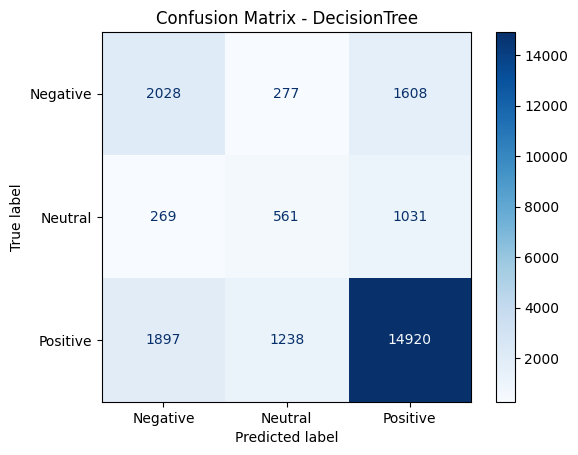

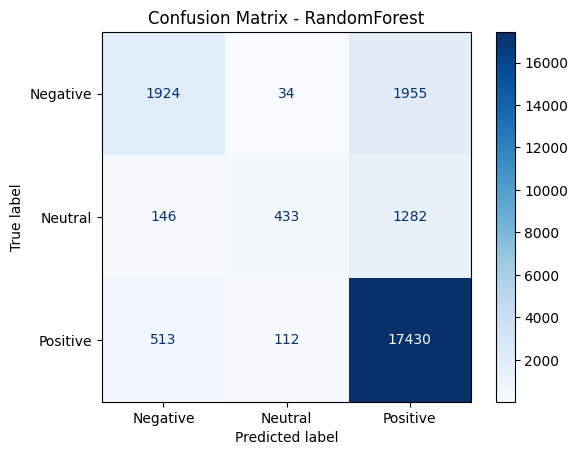

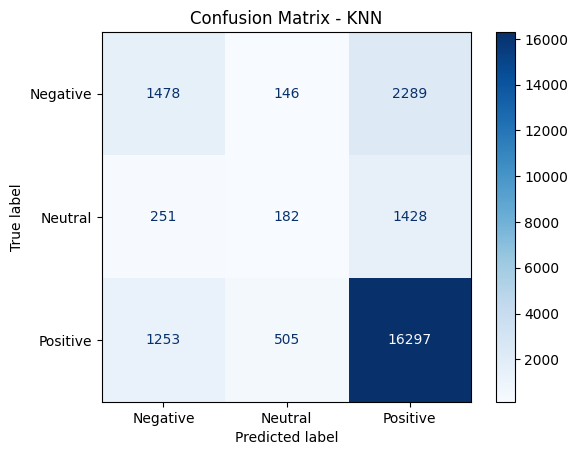

,Model,Accuracy,Precision,Recall,F1
0,Logistic,0.772294,0.701305,0.772294,0.695094
1,DecisionTree,0.734777,0.744323,0.734777,0.739262
2,RandomForest,0.830375,0.819737,0.830375,0.807112
3,KNN,0.753578,0.715425,0.753578,0.729673


In [60]:
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train,y_train)
    pred = pipe.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test,pred),
        "Precision": precision_score(y_test,pred,average="weighted"),
        "Recall": recall_score(y_test,pred,average="weighted"),
        "F1": f1_score(y_test,pred,average="weighted")
    })
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Negative", "Neutral", "Positive"]
    )
    
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

comparison_df = pd.DataFrame(results)
comparison_df

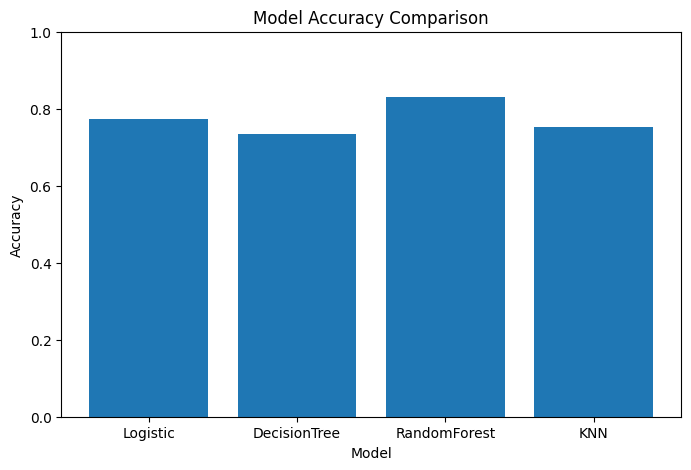

In [61]:
plt.figure(figsize=(8,5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

Among all models, Random Forest achieved the highest overall performance based on:
- Highest accuracy
- Strong weighted F1-score
- Balanced precision and recall across classes

Random Forest performed better because:
- It handles non-linear relationships effectively
- It reduces overfitting through ensemble learning
- It performs well with mixed numerical and categorical features

In [62]:
clf = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

In [63]:
clf.fit(X_train,y_train)
#prediction
pred = clf.predict(X_test)

In [64]:
#evaluation
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

    Negative       0.74      0.49      0.59      3913
     Neutral       0.75      0.23      0.35      1861
    Positive       0.84      0.97      0.90     18055

    accuracy                           0.83     23829
   macro avg       0.78      0.56      0.61     23829
weighted avg       0.82      0.83      0.81     23829



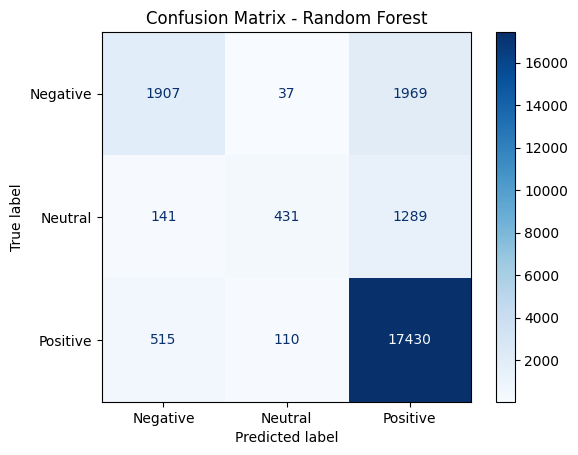

In [65]:
cm = confusion_matrix(y_test.astype(str), pred.astype(str))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Negative", "Neutral", "Positive"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

The confusion matrix shows strong performance for the Positive class, with high true positives.
However, Neutral and Negative classes are sometimes misclassified as Positive due to class imbalance.
This suggests the model is biased toward the majority class.

In [66]:
y_test.dtype

dtype('O')

**OBJECTIVE REGRESSION**
The goal is to build regression models that can accurately estimate the total payment amount and evaluate performance using metrics such as MAE, RMSE, and R² score.

In [67]:
df_reg=df.dropna(subset=["payment_value"])

In [68]:
df_reg.shape

(119140, 47)

In [69]:
# target variable for regression
X_reg=df_reg[features]
y_reg = df_reg["payment_value"]

#split into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)



In [74]:
reg_models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1)
}

reg_results = []

for name, model in reg_models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train,y_train)
    pred = pipe.predict(X_test)
    
    reg_results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test,pred),
        "RMSE": np.sqrt(mean_squared_error(y_test,pred)),
        "R2": r2_score(y_test,pred)
    })

reg_comparison = pd.DataFrame(reg_results)
reg_comparison

,Model,MAE,RMSE,R2
0,Linear,59.662427,137.309439,0.652870
1,RandomForest,52.248715,107.447950,0.787437


Random Forest achieved lower MAE and RMSE and a higher R² score of 0.78 compared to Linear Regression’s 0.65. This indicates that Random Forest captures non-linear relationships better and provides more accurate predictions.

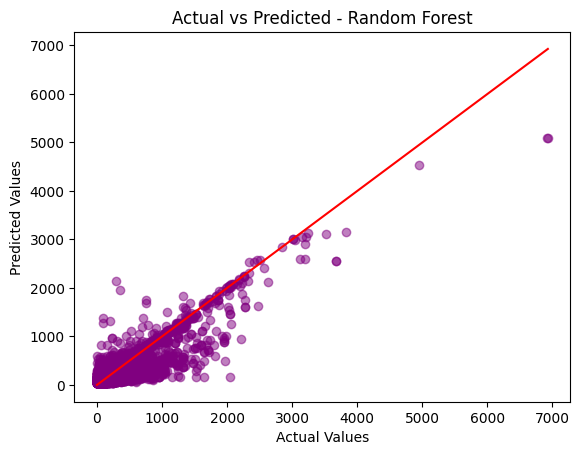

In [78]:
plt.figure()

plt.scatter(y_test, pred, color="purple", alpha=0.5)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest")

plt.show()

This plot compares actual values with predicted values. The red diagonal line represents perfect predictions. Most data points lie close to the line, indicating good model performance. However, some dispersion, especially at higher values, shows prediction errors. This aligns with the R² score of 0.78, suggesting strong but not perfect predictive accuracy.

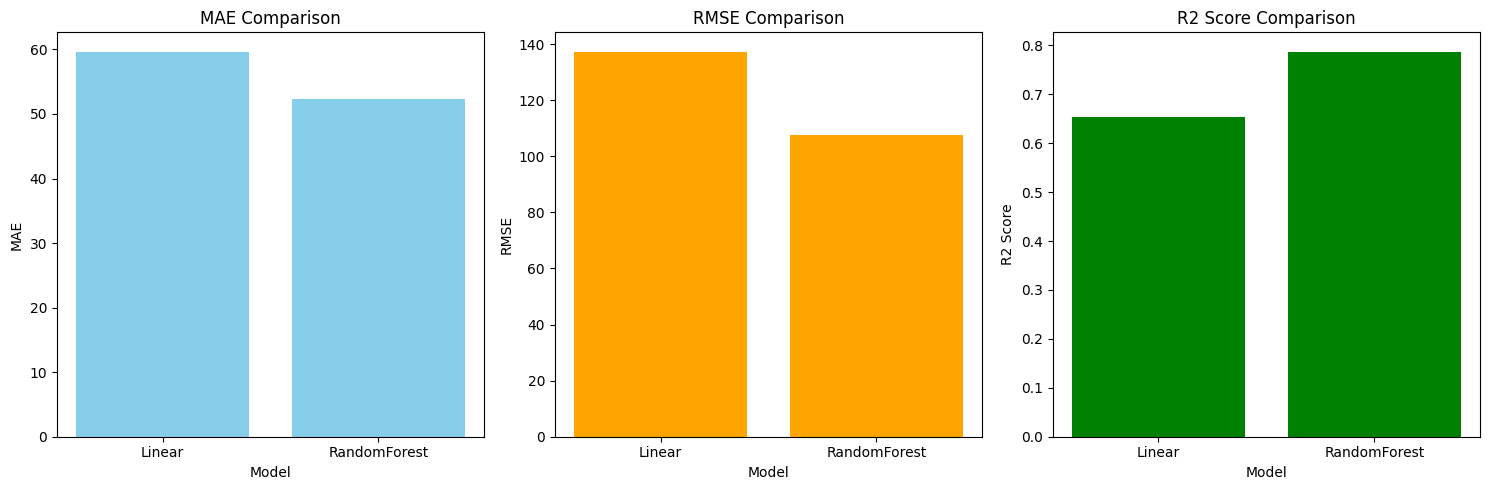

In [79]:
import matplotlib.pyplot as plt

models = reg_comparison["Model"]
mae = reg_comparison["MAE"]
rmse = reg_comparison["RMSE"]
r2 = reg_comparison["R2"]

plt.figure(figsize=(15,5))

# ---- MAE ----
plt.subplot(1,3,1)
plt.bar(models, mae, color="skyblue")
plt.title("MAE Comparison")
plt.xlabel("Model")
plt.ylabel("MAE")

# ---- RMSE ----
plt.subplot(1,3,2)
plt.bar(models, rmse, color="orange")
plt.title("RMSE Comparison")
plt.xlabel("Model")
plt.ylabel("RMSE")

# ---- R2 ----
plt.subplot(1,3,3)
plt.bar(models, r2, color="green")
plt.title("R2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

In [70]:
#pipeline for regression
reg = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1))
])

reg.fit(X_train,y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
#prediction
pred = reg.predict(X_test)



In [72]:
print("MAE:",mean_absolute_error(y_test,pred))
print("R2:",r2_score(y_test,pred))

MAE: 52.248715392143346
R2: 0.7874367245366365


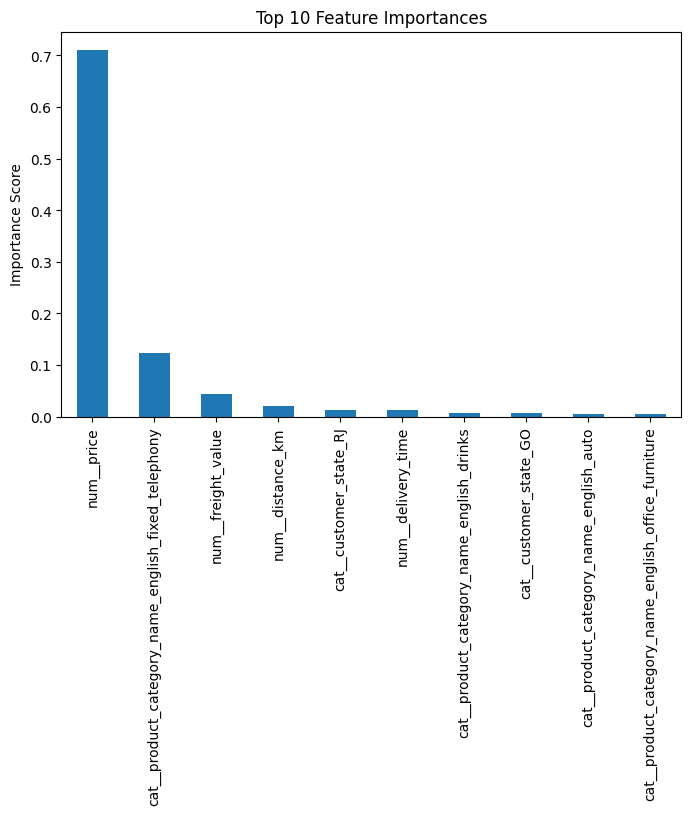

In [ ]:
#top features

# Get trained preprocessor
prep = reg.named_steps['prep']

# Get feature names after transformation
feature_names = prep.get_feature_names_out()

# Get feature importances
importances = reg.named_steps['model'].feature_importances_

# Create series
feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()

Feature importance analysis reveals that product price is the dominant predictor of payment value, contributing over 70% of model importance. Freight value and certain product categories have minor influence, while customer state and delivery-related variables show limited impact. This indicates that payment value is primarily price-driven.